In [2]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from patsy import dmatrices # 可根据离散变量自动生成哑变量
from sklearn.linear_model import LogisticRegression # sk-learn库Logistic Regression模型
from sklearn.model_selection import train_test_split, cross_val_score # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库

> 从../input/HR_comma_sep.csv文件中读入数据，存入data

In [3]:
data = pd.read_csv("./data/HR_comma_sep.csv")
data.left.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# why ?? already int
data.left = data.left.astype(int)

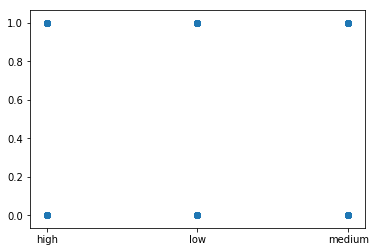

In [8]:
plt.scatter(data.salary, data.left)

观察离职人数与工资分布的关系

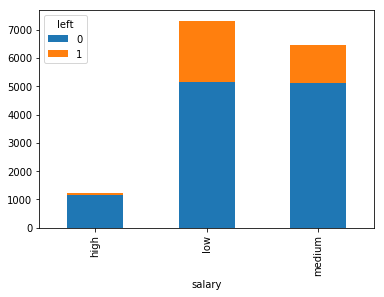

In [9]:
pd.crosstab(data.salary, data.left).plot(kind = "bar", stacked = True)

观察离职比例与工资分布的关系

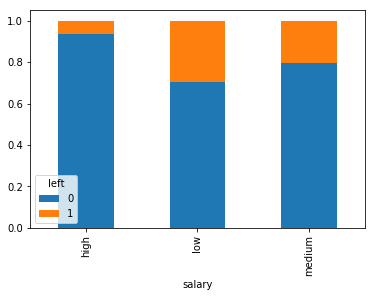

In [10]:
q = pd.crosstab(data.salary, data.left)
q.div(q.sum(1), axis=0).plot(kind="bar", stacked = True)

In [ ]:
观察员工满意度的分布图(histogram)

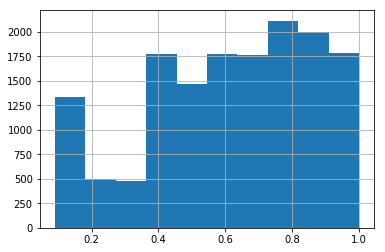

In [11]:
data.satisfaction_level.hist()

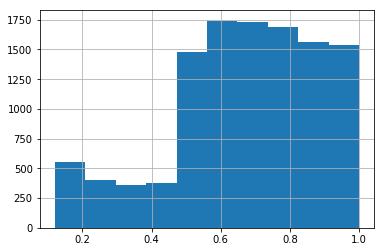

In [12]:
data[data.left == 0].satisfaction_level.hist()

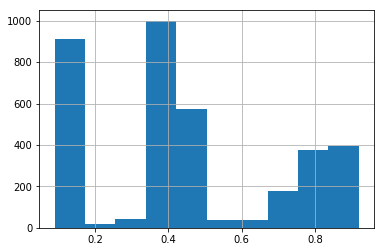

In [17]:
data[data.left == 1].satisfaction_level.hist()

dmatrices将数据中的离散变量变成哑变量，并指明用satisfaction_level, last_evaluation, ... 来预测left

In [13]:
y, X = dmatrices("left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)", data, return_type = "dataframe")

In [14]:
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'}) 
y = np.ravel(y) # 将y变成np的一维数组

用X和y训练模型，然后输出X中每一项自变量对于y的影响
zip(a,b)可将a的每一个元素和b里对应位置的元素组成一对

In [15]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
model.coef_

array([[-0.68682172, -0.48976297,  0.09539256,  0.3286715 , -0.40109702,
         0.08974407, -0.04095296,  0.07497091,  0.16836019,  0.17302139,
         1.78210339,  1.25625653, -4.12823733,  0.733142  , -0.31413789,
         0.00424471,  0.2606884 , -1.52308122, -1.0878429 ]])

In [17]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-0.6868217174961861]
1,Department: Random,[-0.4897629682296885]
2,Department: Accounting,[0.0953925580335726]
3,Department: HR,[0.3286714981642167]
4,Department: Management,[-0.40109702371168127]
5,Department: Marketing,[0.08974406507701978]
6,Department: Product_Management,[-0.04095296197839871]
7,Department: Sales,[0.07497090973637695]
8,Department: Support,[0.16836019132759383]
9,Department: Technical,[0.17302138814471082]


model.score为准确率(0到1之间)

In [18]:
model.score(X,y)

0.793652910194013

In [19]:
print(model.score(X,y))
model.coef_

0.793652910194013


array([[-0.68682172, -0.48976297,  0.09539256,  0.3286715 , -0.40109702,
         0.08974407, -0.04095296,  0.07497091,  0.16836019,  0.17302139,
         1.78210339,  1.25625653, -4.12823733,  0.733142  , -0.31413789,
         0.00424471,  0.2606884 , -1.52308122, -1.0878429 ]])

In [20]:
X.head()

,Intercept,Department: Random,Department: Accounting,Department: HR,Department: Management,Department: Marketing,Department: Product_Management,Department: Sales,Department: Support,Department: Technical,Salary: Low,Salary: Medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0


预测这样一个人的离职概率：
一个高工资HR，
对公司满意度0.5, 
上次评审0.7分，
做过4个项目，
每月平均工作160小时，
在公司呆了3年，
过去5年没有被晋升，
没有工伤

In [21]:
model.predict([[1,0,0,1,0,0,0,0,0,0,0,0,0,0.5,0.7,4,3,0,0]])

array([0.])

In [26]:
model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0,0,0.5,0.7,4,3,0,0]])

array([[0.524793, 0.475207]])

In [23]:
model.predict_proba(X)

array([[0.46917038, 0.53082962],
       [0.83326532, 0.16673468],
       [0.46331781, 0.53668219],
       ...,
       [0.45048264, 0.54951736],
       [0.23631749, 0.76368251],
       [0.43657844, 0.56342156]])

In [25]:
pred = model.predict(X)
pred

array([1., 0., 1., ..., 1., 1., 1.])

In [22]:
(abs(pred-y)).sum() / len(y)

0.20634708980598707

生成7:3的训练测试集并在训练集上训练模型model2

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
model2 = LogisticRegression(C=10000)
model2.fit(Xtrain, ytrain)
pred = model2.predict(Xtest)
metrics.accuracy_score(ytest, pred)


0.7917777777777778

用metrics观察实际离职/未离职被预测成为离职/未离职的数目

In [31]:
metrics.confusion_matrix(ytest, pred)

array([[3199,  263],
       [ 674,  364]])

In [32]:
print(metrics.classification_report(ytest, pred))

             precision    recall  f1-score   support

        0.0       0.83      0.92      0.87      3462
        1.0       0.58      0.35      0.44      1038

avg / total       0.77      0.79      0.77      4500



10份的交叉验证Cross Validation

In [34]:
print(cross_val_score(LogisticRegression(), X, y, scoring = "accuracy", cv = 10))

[0.80746169 0.792      0.79533333 0.78733333 0.804      0.804
 0.79266667 0.79       0.74449633 0.73582388]
